In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import plotly
import json
import plotly.express as px
import skmob
import datetime

In [2]:
df = pd.read_csv("Wroclaw_detail.csv", encoding='latin1', low_memory=False)

In [3]:
df

TripID     TimeStamp   Latitude   Longitude  \
0         574f1cff88c537e377a3e136  1.462552e+09  51.090430   17.033200   
1         574f1cff88c537e377a3e136  1.462552e+09  51.090280   17.033040   
2         574f1cff88c537e377a3e136  1.462552e+09  51.090170   17.033230   
3         574f1cff88c537e377a3e136  1.462552e+09  51.089950   17.033090   
4         574f1cff88c537e377a3e136  1.462552e+09  51.089790   17.033030   
...                            ...           ...        ...         ...   
22456029  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   16.950528   
22456030  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   16.950528   
22456031  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   16.950528   
22456032  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   16.950528   
22456033  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   16.950528   

          Altitude   Distance     Speed   Type  
0              157   0.000000  3.400368  start  
1              156   0.020065  3.041381    mid  
2              155   0.018037  3.783186    mid  
3              159   0.026330  4.527693    mid  
4              160   0.018268  4.776243    mid  
...            ...        ...       ...    ...  
22456029         0   0.002535         0    mid  
22456030         0   0.000095         0    mid  
22456031         0   0.000095         0    mid  
22456032         0   0.000095         0    mid  
22456033         0   0.000095         0    end  

[22456034 rows x 8 columns]

In [75]:
df2 = pd.read_csv("Wroclaw_generic_c.csv", encoding='latin1', low_memory=False, error_bad_lines=False)

b'Skipping line 1665: expected 15 fields, saw 16\nSkipping line 1918: expected 15 fields, saw 16\nSkipping line 4075: expected 15 fields, saw 16\nSkipping line 4248: expected 15 fields, saw 16\nSkipping line 12072: expected 15 fields, saw 16\nSkipping line 12296: expected 15 fields, saw 16\nSkipping line 12634: expected 15 fields, saw 16\nSkipping line 12909: expected 15 fields, saw 16\nSkipping line 16962: expected 15 fields, saw 16\nSkipping line 17772: expected 15 fields, saw 16\nSkipping line 18175: expected 15 fields, saw 16\nSkipping line 18554: expected 15 fields, saw 16\nSkipping line 18757: expected 15 fields, saw 16\nSkipping line 19414: expected 15 fields, saw 16\nSkipping line 26045: expected 15 fields, saw 16\nSkipping line 26581: expected 15 fields, saw 16\nSkipping line 27414: expected 15 fields, saw 16\nSkipping line 28081: expected 15 fields, saw 16\nSkipping line 28281: expected 15 fields, saw 16\nSkipping line 28807: expected 15 fields, saw 16\nSkipping line 29733: e

**Skipped lines**

- "Translator, e-marketing assistant" as profession - coma inside

In [76]:
df2

TripID   TimeStamp                  Start DT  \
0      574f1cff88c537e377a3e136  1464798000  2016-06-01T16:20:00.000Z   
1      574e425b88c537566aa3e0fe  1464782520  2016-06-01T12:02:00.000Z   
2      574e089988c537295ba3e0fa  1464731012  2016-05-31T21:43:32.000Z   
3      574e0a1388c5376877a3e0f6  1464730997  2016-05-31T21:43:17.000Z   
4      574e076e88c537486aa3e0f8  1464730625  2016-05-31T21:37:05.000Z   
...                         ...         ...                       ...   
42351  5732351d88c537e2317b2422  1432532751  2015-05-25T05:45:51.000Z   
42352  5571e7bd88c53764431b7d2a  1408887773  2014-08-24T13:42:53.000Z   
42353  5571e7c488c53765431b7d2a  1408783072  2014-08-23T08:37:52.000Z   
42354  5571e7d088c537e8411b7d2a  1408261802  2014-08-17T07:50:02.000Z   
42355  5571e7d088c537e8411b7d2a  1408261802  2014-08-17T07:50:02.000Z   

        Distance    ECC   AvgSpeed      TrackType  Sex    Year   Profession  \
0          10.41  10.51      15.81  urban bicycle    M  1990.0  Zatrudniony   
1          21.38  21.38      12.71  urban bicycle    M  1979.0       Worker   
2           2.39   2.39      17.40  urban bicycle    M  1994.0      Student   
3           4.70   4.70      18.60  urban bicycle    F  1993.0      Student   
4           4.02   4.02      16.73  urban bicycle    F  1990.0  Zatrudniony   
...          ...    ...        ...            ...  ...     ...          ...   
42351       9.05   0.00      14.93      undefined    F  1981.0          NaN   
42352      24.96   0.00      16.02      undefined    M  1972.0  Zatrudniony   
42353      38.02   0.00       7.31      undefined    M  1972.0  Zatrudniony   
42354      34.60   0.00      10.76      undefined    M  1972.0  Zatrudniony   
42355      34.60   0.00      10.76      undefined    M  1972.0  Zatrudniony   

       Frequent User     ZIP      Source  TypeOfBike  TipeOfTrip  
0                yes  54-237  cy-web-gpx      MyBike     Leisure  
1                yes  51-354  cy-web-gpx          --          --  
2                yes  51-511  cy-android      MyBike       Other  
3                yes  53-511  cy-android      MyBike     Leisure  
4                yes  54-440  cy-android      MyBike     Leisure  
...              ...     ...         ...         ...         ...  
42351            yes     NaN  cy-android          --          --  
42352             no  54-614  cy-web-gpx          --          --  
42353             no  54-614  cy-web-gpx          --          --  
42354             no  54-614  cy-web-gpx          --          --  
42355             no  54-614  cy-web-gpx          --          --  

[42356 rows x 15 columns]

In [77]:
df2[' Sex'] = df2[' Sex'].astype('category')

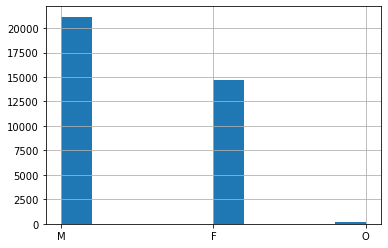

In [78]:
df2[' Sex'].hist()

In [79]:
df2[' Year']

0        1990.0
1        1979.0
2        1994.0
3        1993.0
4        1990.0
          ...  
42351    1981.0
42352    1972.0
42353    1972.0
42354    1972.0
42355    1972.0
Name:  Year, Length: 42356, dtype: float64

In [80]:
df2[' Year'].min()

1908.0

In [81]:
df2[' Year'].max()

2008.0

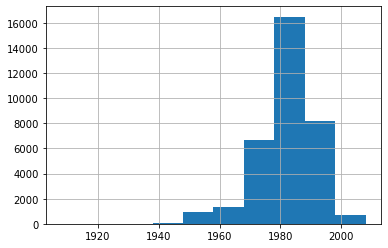

In [82]:
df2[' Year'].hist()

(1940.0, 2008.0)

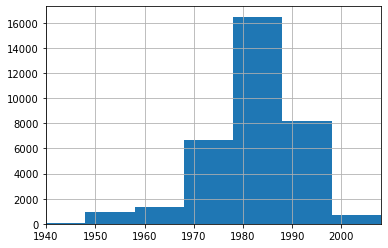

In [83]:
hist = df2[' Year'].hist()
hist.set_xlim((1940,2008))

In [84]:
df2[' Profession'] = df2[' Profession'].astype('category')

In [85]:
df2[' Profession'].value_counts()[:20].index.tolist()

['Zatrudniony',
 'Worker',
 'Student',
 'Nie pracujÄ\x85cy',
 'IT',
 'student',
 'UX/UI Designer',
 'Edukator',
 'urzÄ\x99dnik',
 'Nauczyciel',
 'InÅ¼ynier',
 'Emeryt',
 'it specialist',
 'culture manager',
 'statystyk',
 'architect',
 'Dentist',
 'Lekarz',
 'X',
 'DOMOWE NAPRAWY']

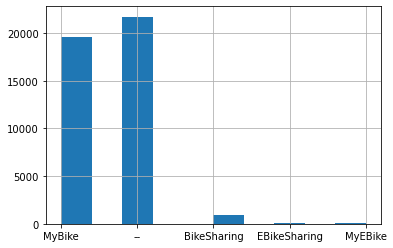

In [86]:
df2[' TypeOfBike'].hist()

In [87]:
df2.columns

Index(['TripID', ' TimeStamp', ' Start DT', ' Distance', ' ECC', ' AvgSpeed',
       ' TrackType', ' Sex', ' Year', ' Profession', ' Frequent User', ' ZIP',
       ' Source', ' TypeOfBike', ' TipeOfTrip'],
      dtype='object')

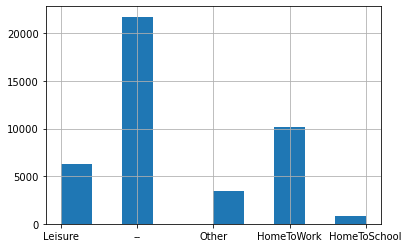

In [88]:
df2[' TipeOfTrip'].hist()

In [89]:
df.columns

Index(['index', 'TripID', ' TimeStamp', 'Latitude', ' Longitude', ' Altitude',
       ' Distance', ' Speed', ' Type', 'geometry', 'Date'],
      dtype='object')

In [90]:
df = df.dropna().reset_index()

In [ ]:
df

In [19]:
df['Date'] = [datetime.datetime.fromtimestamp(x) for x in df[' TimeStamp']]

In [6]:
tdf = skmob.TrajDataFrame(df, latitude="Latitude", longitude=" Longitude", datetime='Date', user_id='TripID')
len(tdf['uid'].unique())

42364

In [7]:
tdf

index                       uid     TimeStamp        lat  \
0                0  574f1cff88c537e377a3e136  1.462552e+09  51.090430   
1                1  574f1cff88c537e377a3e136  1.462552e+09  51.090280   
2                2  574f1cff88c537e377a3e136  1.462552e+09  51.090170   
3                3  574f1cff88c537e377a3e136  1.462552e+09  51.089950   
4                4  574f1cff88c537e377a3e136  1.462552e+09  51.089790   
...            ...                       ...           ...        ...   
22437339  22456029  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   
22437340  22456030  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   
22437341  22456031  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   
22437342  22456032  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   
22437343  22456033  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   

                lng  Altitude   Distance     Speed   Type            datetime  
0         17.033200       157   0.000000  3.400368  start 2016-05-06 18:32:17  
1         17.033040       156   0.020065  3.041381    mid 2016-05-06 18:32:22  
2         17.033230       155   0.018037  3.783186    mid 2016-05-06 18:32:27  
3         17.033090       159   0.026330  4.527693    mid 2016-05-06 18:32:32  
4         17.033030       160   0.018268  4.776243    mid 2016-05-06 18:32:40  
...             ...       ...        ...       ...    ...                 ...  
22437339  16.950528         0   0.002535         0    mid 2014-08-17 13:02:28  
22437340  16.950528         0   0.000095         0    mid 2014-08-17 13:02:34  
22437341  16.950528         0   0.000095         0    mid 2014-08-17 13:02:53  
22437342  16.950528         0   0.000095         0    mid 2014-08-17 13:02:57  
22437343  16.950528         0   0.000095         0    end 2014-08-17 13:02:58  

[22437344 rows x 10 columns]

In [9]:
tdf.plot_trajectory()

In [11]:
tdf[tdf['datetime'].dt.year == 2016].plot_trajectory()

In [13]:
tdf[tdf['datetime'].dt.year == 2015].plot_trajectory()

In [12]:
tdf[tdf['datetime'].dt.year == 2014].plot_trajectory()

In [4]:
wroc_map = gpd.read_file('EtapII-REJONY_wroclaw.shp')

city_regions = wroc_map[['NUMBER', 'geometry']]
city_regions.columns = ['REGION', 'geometry']

In [5]:
city_regions = city_regions.to_crs(epsg=4326)

In [61]:
for index, row in wroc_map.iterrows():
    print(f"Region: {row['NAME']}, number: {row['NUMBER']}")

Region: Komandorska/Swobodna, number: 22
Region: Centrum PoÅudniowe, number: 23
Region: Stysia, number: 24
Region: OstrÃ³w Tumski, number: 25
Region: Szczytnicka, number: 26
Region: UWr 2, number: 27
Region: Politechnika, number: 28
Region: Kliniki, number: 29
Region: Plac Grunwaldzki, number: 30
Region: Grunwaldzka, number: 31
Region: Prusa/Nowowiejska, number: 32
Region: Jaracza, number: 33
Region: Browar Piastowski, number: 34
Region: Park ToÅpy, number: 35
Region: JednoÅci Narodowej, number: 36
Region: WzgÃ³rze SÅowiaÅskie, number: 37
Region: Na SzaÅcach, number: 38
Region: Dworzec Nadodrze, number: 39
Region: Pomorska, number: 40
Region: Ks. Witolda, number: 41
Region: KÄpa MieszczaÅska, number: 42
Region: Rynek, number: 1
Region: UWr, number: 2
Region: Hala Targowa, number: 3
Region: Pl. DominikaÅski, number: 4
Region: Skargi, number: 5
Region: Pd. Czterech Kultur, number: 6
Region: Pn. Czterech Kultur, number: 7
Region: Pl. SolidarnoÅci, number: 8
Region: Pl. OrlÄt Lw

Region: Cm. KieÅczowski, number: 302
Region: ÅÄcznik DÅugoÅÄka/Odolano, number: 303
Region: Osiedla Sobieskiego, number: 304
Region: ZakrzÃ³w, number: 305
Region: Polar, number: 306
Region: Piwnika-Ponurego, number: 307
Region: PawÅowice, number: 308
Region: WÄzeÅ PawÅowice, number: 309
Region: StarodÄbowa, number: 310
Region: KÅokoczyce, number: 311
Region: Poprzeczna, number: 312
Region: SoÅtysowice, number: 313
Region: Polanowice, number: 314
Region: WÄzeÅ Widawa, number: 315
Region: Centrostal, number: 316
Region: Cholewkarska, number: 317
Region: Widawa, number: 318
Region: Kominiarska, number: 319
Region: Lipa Piotrowska, number: 320
Region: Kminkowa, number: 321
Region: Zalipie, number: 322
Region: Åwinary, number: 323
Region: Wrzosowa, number: 324
Region: KaczeÅcowa, number: 325
Region: RÄdzin, number: 326
Region: Las RÄdziÅski, number: 327
Region: Zapotocze, number: 328
Region: Lesica, number: 329
Region: Las Lesicki, number: 330
Region: Podwale/SÄdy, numb

In [7]:
geometry = [Point(xy) for xy in zip(df[" Longitude"], df["Latitude"])]

In [11]:
geo_df = gpd.GeoDataFrame(df, crs = "EPSG:4326", geometry = geometry)
geo_df.head()

TripID     TimeStamp  Latitude   Longitude  Altitude  \
0  574f1cff88c537e377a3e136  1.462552e+09  51.09043    17.03320       157   
1  574f1cff88c537e377a3e136  1.462552e+09  51.09028    17.03304       156   
2  574f1cff88c537e377a3e136  1.462552e+09  51.09017    17.03323       155   
3  574f1cff88c537e377a3e136  1.462552e+09  51.08995    17.03309       159   
4  574f1cff88c537e377a3e136  1.462552e+09  51.08979    17.03303       160   

    Distance     Speed   Type                   geometry  
0   0.000000  3.400368  start  POINT (17.03320 51.09043)  
1   0.020065  3.041381    mid  POINT (17.03304 51.09028)  
2   0.018037  3.783186    mid  POINT (17.03323 51.09017)  
3   0.026330  4.527693    mid  POINT (17.03309 51.08995)  
4   0.018268  4.776243    mid  POINT (17.03303 51.08979)

In [12]:
df['geometry'] = geo_df['geometry']

In [20]:
df

index                    TripID     TimeStamp   Latitude  \
0                0  574f1cff88c537e377a3e136  1.462552e+09  51.090430   
1                1  574f1cff88c537e377a3e136  1.462552e+09  51.090280   
2                2  574f1cff88c537e377a3e136  1.462552e+09  51.090170   
3                3  574f1cff88c537e377a3e136  1.462552e+09  51.089950   
4                4  574f1cff88c537e377a3e136  1.462552e+09  51.089790   
...            ...                       ...           ...        ...   
22437339  22456029  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   
22437340  22456030  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   
22437341  22456031  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   
22437342  22456032  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   
22437343  22456033  5571e7d088c537e8411b7d2a  1.408273e+09  51.099718   

           Longitude  Altitude   Distance     Speed   Type  \
0          17.033200       157   0.000000  3.400368  start   
1          17.033040       156   0.020065  3.041381    mid   
2          17.033230       155   0.018037  3.783186    mid   
3          17.033090       159   0.026330  4.527693    mid   
4          17.033030       160   0.018268  4.776243    mid   
...              ...       ...        ...       ...    ...   
22437339   16.950528         0   0.002535         0    mid   
22437340   16.950528         0   0.000095         0    mid   
22437341   16.950528         0   0.000095         0    mid   
22437342   16.950528         0   0.000095         0    mid   
22437343   16.950528         0   0.000095         0    end   

                           geometry                Date  
0         POINT (17.03320 51.09043) 2016-05-06 18:32:17  
1         POINT (17.03304 51.09028) 2016-05-06 18:32:22  
2         POINT (17.03323 51.09017) 2016-05-06 18:32:27  
3         POINT (17.03309 51.08995) 2016-05-06 18:32:32  
4         POINT (17.03303 51.08979) 2016-05-06 18:32:40  
...                             ...                 ...  
22437339  POINT (16.95053 51.09972) 2014-08-17 13:02:28  
22437340  POINT (16.95053 51.09972) 2014-08-17 13:02:34  
22437341  POINT (16.95053 51.09972) 2014-08-17 13:02:53  
22437342  POINT (16.95053 51.09972) 2014-08-17 13:02:57  
22437343  POINT (16.95053 51.09972) 2014-08-17 13:02:58  

[22437344 rows x 11 columns]

In [21]:
df_start_stop = df[df[' Type']!='mid']

In [22]:
df_start = df[df[' Type']=='start']

In [23]:
df_end = df[df[' Type']=='end']

In [24]:
df_start = df_start[['geometry','Date','TripID']]
df_end = df_end[['geometry','Date','TripID']]
df_start_end = df_start.set_index('TripID').join(df_end.set_index('TripID'),lsuffix = '_start', rsuffix = '_end')
df_start_end

geometry_start          Date_start  \
TripID                                                                    
574f1cff88c537e377a3e136  POINT (17.03320 51.09043) 2016-05-06 18:32:17   
574e425b88c537566aa3e0fe  POINT (16.99408 51.11318) 2016-05-11 14:24:31   
574e089988c537295ba3e0fa  POINT (17.07723 51.10846) 2016-05-31 23:43:38   
574e0a1388c5376877a3e0f6  POINT (17.07771 51.10812) 2016-05-31 23:43:22   
574e076e88c537486aa3e0f8  POINT (17.00275 51.10800) 2016-05-31 23:37:16   
...                                             ...                 ...   
5732351d88c5377b537b23c7  POINT (16.92915 51.10514) 2015-05-25 09:30:08   
5732351d88c537e2317b2422  POINT (16.98753 51.14551) 2015-05-25 07:46:14   
5571e7bd88c53764431b7d2a  POINT (16.94769 51.10020) 2014-08-24 15:42:53   
5571e7c488c53765431b7d2a  POINT (16.94710 51.10641) 2014-08-23 10:37:52   
5571e7d088c537e8411b7d2a  POINT (16.95034 51.09967) 2014-08-17 09:50:02   

                                       geometry_end            Date_end  
TripID                                                                   
574f1cff88c537e377a3e136  POINT (16.97578 51.13789) 2016-05-06 19:22:48  
574e425b88c537566aa3e0fe  POINT (17.12595 51.14234) 2016-05-11 16:05:28  
574e089988c537295ba3e0fa  POINT (17.10334 51.11365) 2016-05-31 23:51:43  
574e0a1388c5376877a3e0f6  POINT (17.03058 51.09683) 2016-05-31 23:58:27  
574e076e88c537486aa3e0f8  POINT (16.95687 51.11799) 2016-05-31 23:51:21  
...                                             ...                 ...  
5732351d88c5377b537b23c7  POINT (16.97066 51.13763) 2015-05-25 10:00:35  
5732351d88c537e2317b2422  POINT (16.92912 51.10509) 2015-05-25 08:22:05  
5571e7bd88c53764431b7d2a  POINT (16.95050 51.09971) 2014-08-24 17:16:22  
5571e7c488c53765431b7d2a  POINT (16.95052 51.09970) 2014-08-23 15:49:54  
5571e7d088c537e8411b7d2a  POINT (16.95053 51.09972) 2014-08-17 13:02:58  

[42261 rows x 4 columns]

In [25]:
df_start_end = df_start_end.dropna()

In [28]:
def point_in(regions, point):
    for index, row in regions.iterrows():
        if point.within(row['geometry']):
            return row['REGION']
    return 0  

In [29]:
travels = pd.DataFrame(columns=['HOUR', 'ORIGIN', 'DESTINATION'])
for index, row in df_start_end.iterrows():
    origin = point_in(city_regions, row['geometry_start'])
    destination = point_in(city_regions, row['geometry_end'])
    time_middle = row['Date_start'] + (row['Date_end'] - row['Date_start'])/2
    hour = time_middle.hour
    travels = travels.append({'HOUR': hour, 'ORIGIN': origin, 'DESTINATION': destination}, ignore_index=True)    

In [30]:
travels

HOUR ORIGIN DESTINATION FLOW
0       18     63         149    1
1       15    119         299    1
2       23     73          81    1
3       23     73          22    1
4       23     52         163    1
...    ...    ...         ...  ...
42130    9    253         149    1
42131    8    112         253    1
42132   16    347         347    1
42133   13    171         347    1
42134   11    347         347    1

[42135 rows x 4 columns]

In [41]:
travels2 = travels.groupby(['HOUR','ORIGIN','DESTINATION']).size().reset_index(name='counts')

In [39]:
travels.to_csv("travels.csv")

In [43]:
max(travels2['counts'])

101

In [51]:
travels2 = travels2[travels2['ORIGIN']!=0]
travels2 = travels2[travels2['DESTINATION']!=0]
travels2 = travels2[travels2['DESTINATION']!=travels2['ORIGIN']]

In [70]:
travels_from = travels2[travels2['ORIGIN'] == 30]
travels_to = travels2[travels2['DESTINATION'] == 30]

In [71]:
fdf_from = skmob.FlowDataFrame(
    data=travels_from,
    origin='ORIGIN',
    destination='DESTINATION',
    flow='counts',
    tile_id='REGION',
    tessellation=city_regions,
    datetime='HOUR',
    timestamp=True
)

In [72]:
m = fdf_from.plot_tessellation(tiles='OpenStreetMap')
fdf_from.plot_flows(m, flow_color='red', tiles='OpenStreetMap', min_flow=5)

In [73]:
fdf_to = skmob.FlowDataFrame(
    data=travels_to,
    origin='ORIGIN',
    destination='DESTINATION',
    flow='counts',
    tile_id='REGION',
    tessellation=city_regions,
    datetime='HOUR',
    timestamp=True
)

In [74]:
m = fdf_to.plot_tessellation(tiles='OpenStreetMap')
fdf_to.plot_flows(m, flow_color='red', tiles='OpenStreetMap', min_flow=5)